<a href="https://colab.research.google.com/github/KayalvizhiT513/Walmart_lab1/blob/main/Efficient_Frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

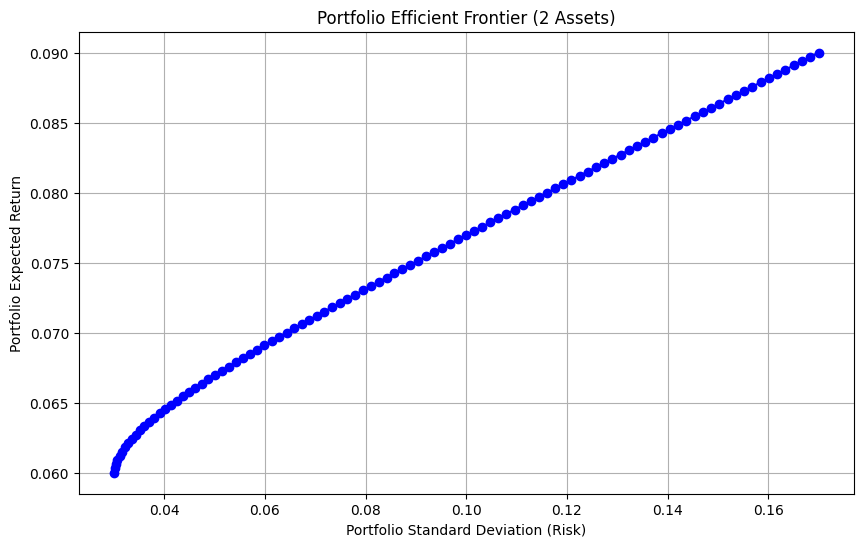

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs
E_R1 = 0.09
SD_R1 = 0.17
E_R2 = 0.06
SD_R2 = 0.03
correlation = 0.23

# Calculate covariance
covariance = correlation * SD_R1 * SD_R2

# Prepare weight range
weights = np.linspace(0, 1, 100)
expected_returns = []
portfolio_sds = []

# Loop over weights
for w1 in weights:
    w2 = 1 - w1
    # Expected return
    E_Rp = w1 * E_R1 + w2 * E_R2
    # Variance and SD
    var_Rp = (w1**2 * SD_R1**2) + (w2**2 * SD_R2**2) + (2 * w1 * w2 * covariance)
    SD_Rp = np.sqrt(var_Rp)

    expected_returns.append(E_Rp)
    portfolio_sds.append(SD_Rp)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(portfolio_sds, expected_returns, marker='o', linestyle='-', color='blue')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Efficient Frontier (2 Assets)')
plt.grid(True)
plt.show()


In [ ]:
E_R1 = 0.151
VAR_R1 = 0.023
E_R2 = 0.125
VAR_R2 = 0.014
E_R3 = 0.147
VAR_R3 = 0.0180
E_R4 = 0.0902
VAR_R4 = 0.0340
E_R5 = 0.1768
VAR_R5 = 0.0260

COV_R1_R2 = 0.0093
COV_R1_R3 = 0.0062
COV_R1_R4 = 0.0074
COV_R1_R5 = -0.0023
COV_R2_R3 = 0.0022
COV_R2_R4 = 0.0056
COV_R2_R5 = 0.0026
COV_R3_R4 = 0.0078
COV_R3_R5 = -0.0027
COV_R4_R5 = -0.0056

In [ ]:
# Generate 1000 portfolios with 5 assets
n_assets = 5
n_portfolios = 1000
weights = np.random.dirichlet(np.ones(n_assets), n_portfolios)

In [ ]:
expected_returns = []
portfolio_sds = []

for w in weights:
    E_Rp = np.dot(w, [E_R1, E_R2, E_R3, E_R4, E_R5])
    var_Rp = w[0]**2 * VAR_R1 + w[1]**2 * VAR_R2 + w[2]**2 * VAR_R3 + w[3]**2 * VAR_R4 + w[4]**2 * VAR_R5 + \
              2 * w[0] * w[1] * COV_R1_R2 + 2 * w[0] * w[2] * COV_R1_R3 + 2 * w[0] * w[3] * COV_R1_R4 + 2 * w[0] * w[4] * COV_R1_R5 + \
              2 * w[1] * w[2] * COV_R2_R3 + 2 * w[1] * w[3] * COV_R2_R4 + 2 * w[1] * w[4] * COV_R2_R5 + 2 * w[2] * w[3] * COV_R3_R4 + 2 * w[2] * w[4] * COV_R3_R5 + \
              2 * w[3] * w[4] * COV_R4_R5

    expected_returns.append(E_Rp)
    portfolio_sds.append(np.sqrt(var_Rp))

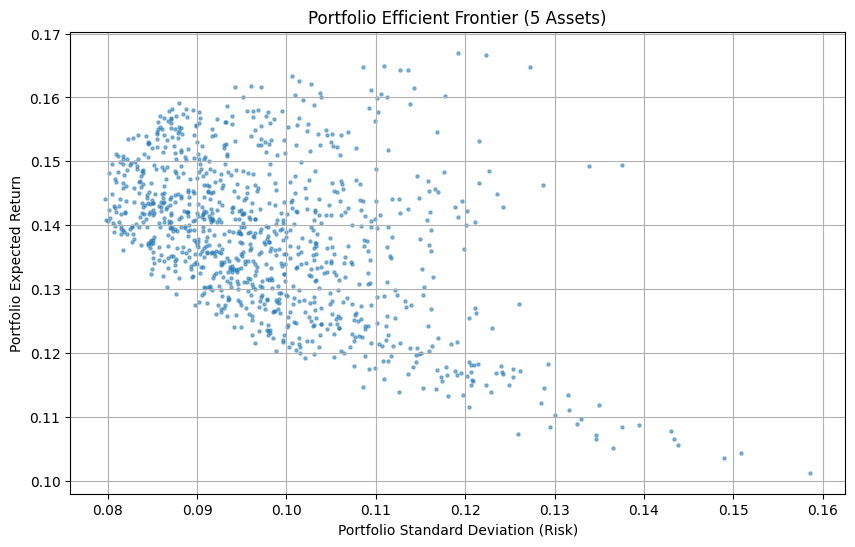

In [ ]:

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_sds, expected_returns, marker='o', s=5, alpha=0.5)

plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Efficient Frontier (5 Assets)')
plt.grid(True)
plt.show()

In [ ]:
def calc_portfolios(E_R1, VAR_R1, E_R2, VAR_R2):
    expected_returns = []
    portfolio_sds = []

    weights = np.linspace(0, 1, 100)
    for w1 in weights:
        w2 = 1 - w1
        expected_return = w1 * E_R1 + w2 * E_R2
        var = (w1**2 * VAR_R1) + (w2**2 * VAR_R2)
        sd = np.sqrt(var)
        expected_returns.append(expected_return)
        portfolio_sds.append(sd)

    return expected_returns, portfolio_sds

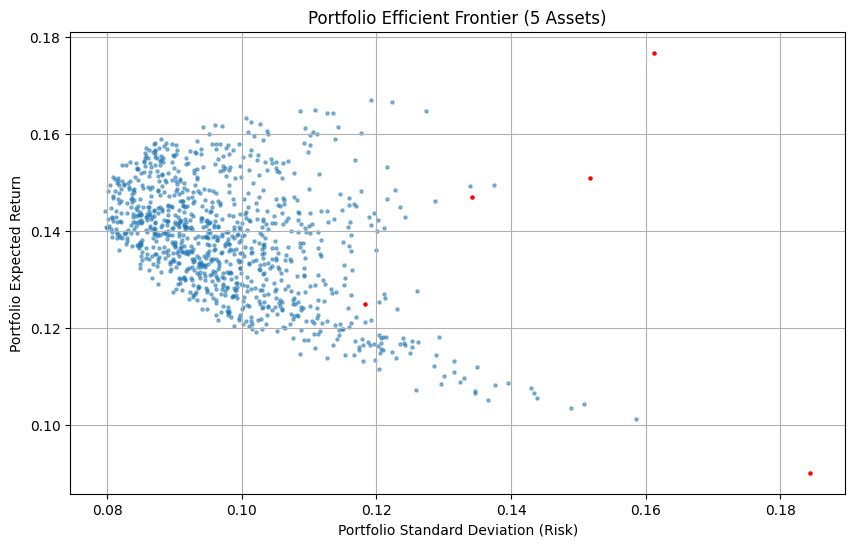

In [ ]:

individual_returns = [E_R1, E_R2, E_R3, E_R4, E_R5]
individual_sds = [np.sqrt(VAR_R1), np.sqrt(VAR_R2), np.sqrt(VAR_R3), np.sqrt(VAR_R4), np.sqrt(VAR_R5)]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_sds, expected_returns, marker='o', s=5, alpha=0.5)

# Highlight individual assets
plt.scatter(individual_sds, individual_returns, color='red', marker='o', s=5, label='Individual Assets')


plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Efficient Frontier (5 Assets)')
plt.grid(True)
plt.show()

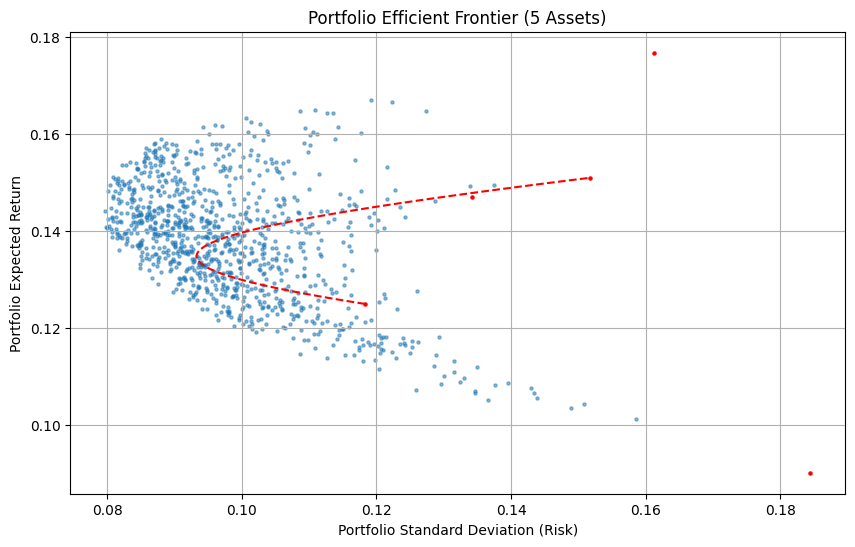

In [ ]:
expected_returns_btwn_2_assets, portfolio_sds_btwn_2_assets = calc_portfolios(E_R1, VAR_R1, E_R2, VAR_R2)

individual_returns = [E_R1, E_R2, E_R3, E_R4, E_R5]
individual_sds = [np.sqrt(VAR_R1), np.sqrt(VAR_R2), np.sqrt(VAR_R3), np.sqrt(VAR_R4), np.sqrt(VAR_R5)]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_sds, expected_returns, marker='o', s=5, alpha=0.5)
plt.plot(portfolio_sds_btwn_2_assets, expected_returns_btwn_2_assets, color='red', linestyle='--', label='2 Assets')

# Highlight individual assets
plt.scatter(individual_sds, individual_returns, color='red', marker='o', s=5, label='Individual Assets')


plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Efficient Frontier (5 Assets)')
plt.grid(True)
plt.show()

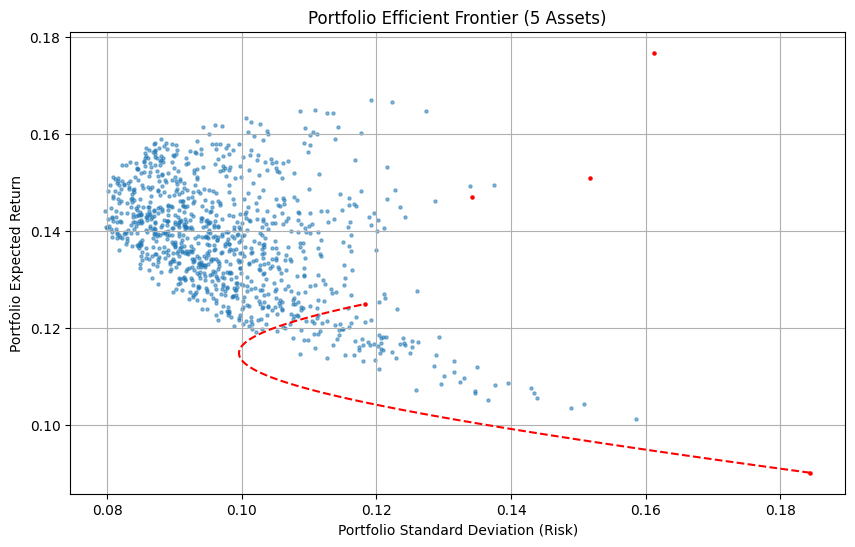

In [ ]:
expected_returns_btwn_2_assets, portfolio_sds_btwn_2_assets = calc_portfolios(E_R2, VAR_R2, E_R4, VAR_R4)

individual_returns = [E_R1, E_R2, E_R3, E_R4, E_R5]
individual_sds = [np.sqrt(VAR_R1), np.sqrt(VAR_R2), np.sqrt(VAR_R3), np.sqrt(VAR_R4), np.sqrt(VAR_R5)]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_sds, expected_returns, marker='o', s=5, alpha=0.5)
plt.plot(portfolio_sds_btwn_2_assets, expected_returns_btwn_2_assets, color='red', linestyle='--', label='2 Assets')

# Highlight individual assets
plt.scatter(individual_sds, individual_returns, color='red', marker='o', s=5, label='Individual Assets')


plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Efficient Frontier (5 Assets)')
plt.grid(True)
plt.show()

In [ ]:
# Generate 1000 portfolios with 5 assets
n_assets = 5
n_portfolios = 10000
weights = np.random.dirichlet(np.ones(n_assets), n_portfolios)

In [ ]:
expected_returns = []
portfolio_sds = []

for w in weights:
    E_Rp = np.dot(w, [E_R1, E_R2, E_R3, E_R4, E_R5])
    var_Rp = w[0]**2 * VAR_R1 + w[1]**2 * VAR_R2 + w[2]**2 * VAR_R3 + w[3]**2 * VAR_R4 + w[4]**2 * VAR_R5 + \
              2 * w[0] * w[1] * COV_R1_R2 + 2 * w[0] * w[2] * COV_R1_R3 + 2 * w[0] * w[3] * COV_R1_R4 + 2 * w[0] * w[4] * COV_R1_R5 + \
              2 * w[1] * w[2] * COV_R2_R3 + 2 * w[1] * w[3] * COV_R2_R4 + 2 * w[1] * w[4] * COV_R2_R5 + 2 * w[2] * w[3] * COV_R3_R4 + 2 * w[2] * w[4] * COV_R3_R5 + \
              2 * w[3] * w[4] * COV_R4_R5

    expected_returns.append(E_Rp)
    portfolio_sds.append(np.sqrt(var_Rp))

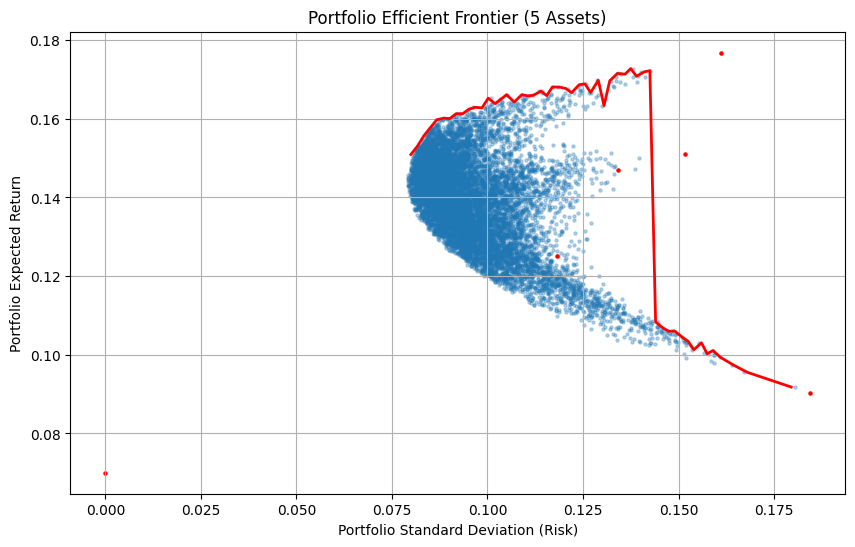

In [ ]:
import pandas as pd

individual_returns = [E_R1, E_R2, E_R3, E_R4, E_R5, 0.07]
individual_sds = [np.sqrt(VAR_R1), np.sqrt(VAR_R2), np.sqrt(VAR_R3), np.sqrt(VAR_R4), np.sqrt(VAR_R5), 0]

# Efficient Frontier
# Assume expected_returns and portfolio_sds are lists or arrays
data = pd.DataFrame({
    'return': np.array(expected_returns),
    'sd': np.array(portfolio_sds)
})

# Define bins for SD (e.g., 50 bins)
num_bins = 60
data['sd_bin'] = pd.cut(data['sd'], bins=num_bins)

# Group and safely extract the max return per bin
efficient_points = []
for bin_interval, group in data.groupby('sd_bin', observed=True):  # observed=True to match future pandas default
    if not group.empty:
        max_row = group.loc[group['return'].idxmax()]
        efficient_points.append({
            'sd_median': bin_interval.mid,
            'return': max_row['return']
        })

# Convert to DataFrame
efficient_df = pd.DataFrame(efficient_points)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['sd'], data['return'], alpha=0.3, s=5, label="All Portfolios")
plt.plot(efficient_df['sd_median'], efficient_df['return'], color='red', linewidth=2, label="Efficient Frontier")

# Highlight individual assets
plt.scatter(individual_sds, individual_returns, color='red', marker='o', s=5, label='Individual Assets')


plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Efficient Frontier (5 Assets)')
plt.grid(True)
plt.show()

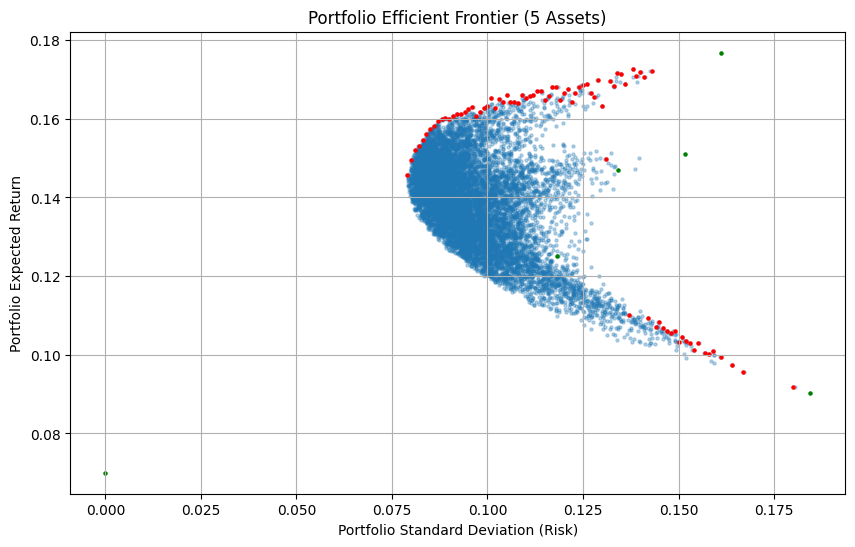

In [ ]:
# Efficient Frontier
efficient_frontier = {}
for ret, sd in zip(expected_returns, portfolio_sds):
    sd = round(sd, 3)
    if sd not in efficient_frontier:
        efficient_frontier[sd] = ret
    else:
        efficient_frontier[sd] = max(efficient_frontier[sd], ret)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['sd'], data['return'], alpha=0.3, s=5, label="All Portfolios")
plt.scatter(list(efficient_frontier.keys()), list(efficient_frontier.values()), s=5, color='red', label="Efficient Frontier")

# Highlight individual assets
plt.scatter(individual_sds, individual_returns, color='green', marker='o', s=5, label='Individual Assets')


plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Expected Return')
plt.title('Portfolio Efficient Frontier (5 Assets)')
plt.grid(True)
plt.show()